# 00 - Data exploration

Open and inspect raw and merged datasets to understand schemas and missingness.

#  
### Objective
Explore and understand the Big Data Bowl 2026 dataset (input, output, supplementary).
Identify which fields are available, what’s missing, and what must be reconstructed.


In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nfl_big_data_bowl_2026_analytics = kagglehub.competition_download('nfl-big-data-bowl-2026-analytics')

print('Data source import complete.')

100%|██████████| 103M/103M [00:01<00:00, 104MB/s] 

Extracting files...


Data source import complete.


In [5]:
print(nfl_big_data_bowl_2026_analytics)

/root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-analytics


In [6]:
!ls /root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-analytics

114239_nfl_competition_files_published_analytics_final


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
import pandas as pd
import os

# Define the path to the data directory
data_dir = '/root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train'

# Construct the full path to the input data for week 1
week1_input_path = os.path.join(data_dir, 'input_2023_w01.csv')

# Load the week 1 input data into a pandas DataFrame
week1_input_df = pd.read_csv(week1_input_path)

# Display the first few rows of the DataFrame
display(week1_input_df.sample(20))

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
240042,2023091012,55,False,47803,7,right,35,Noah Fant,6-4,249,...,Other Route Runner,32.44,31.53,6.49,1.95,13.32,58.20,10,37.900002,9.470000
212605,2023091010,3640,True,46279,42,right,30,Braxton Berrios,5-9,190,...,Targeted Receiver,43.32,31.12,8.04,4.17,26.60,39.28,17,44.880001,50.580002
222145,2023091011,1224,True,45185,6,right,66,Kendrick Bourne,6-1,203,...,Targeted Receiver,64.88,41.33,2.21,5.51,108.84,101.27,8,71.930000,37.650002
29206,2023091000,2101,False,46215,4,left,43,Tre Flowers,6-3,203,...,Defensive Coverage,42.81,16.62,0.68,3.36,36.44,75.96,10,35.599998,36.630001
39664,2023091001,1470,True,44854,6,right,57,Marcus Williams,6-1,195,...,Defensive Coverage,69.03,32.55,0.42,1.94,219.66,179.19,10,57.619999,39.189999
105251,2023091004,3874,False,54571,7,left,56,Cade Otton,6-5,250,...,Other Route Runner,56.65,36.08,2.91,3.74,266.87,260.11,11,49.480000,9.940000
243615,2023091012,783,False,52435,3,left,27,Jordyn Brooks,6-1,245,...,Defensive Coverage,23.62,19.51,0.09,0.33,219.69,60.65,9,23.809999,42.070000
111780,2023091005,1394,True,53505,36,right,37,Paulson Adebo,6-0,193,...,Defensive Coverage,41.46,27.79,6.63,1.78,340.05,299.78,10,43.349998,36.299999
228872,2023091011,2580,False,46118,7,right,70,Dallas Goedert,6-5,256,...,Other Route Runner,70.38,16.71,1.95,3.70,75.35,112.59,8,72.199997,12.400000
34708,2023091000,3886,False,55865,15,right,40,Bryce Young,6-0,194,...,Passer,32.95,23.67,2.63,1.07,272.53,110.17,7,38.459999,28.110001


In [9]:
import pandas as pd
import os

# Define the path to the data directory
data_dir = '/root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final'

# Construct the full path to the output data for week 1
week1_output_path = os.path.join(data_dir, 'train', 'output_2023_w01.csv')

# Load the week 1 output data into a pandas DataFrame
week1_output_df = pd.read_csv(week1_output_path)

# Display the first few rows of the DataFrame
print("First 5 rows of output_2023_w01.csv:")
display(week1_output_df.head())

First 5 rows of output_2023_w01.csv:


,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56


In [10]:
import pandas as pd
import os

# Define the path to the data directory
data_dir = '/root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final'

# Construct the full path to the supplementary data
supplementary_data_path = os.path.join(data_dir, 'supplementary_data.csv')

# Load the supplementary data into a pandas DataFrame
supplementary_df = pd.read_csv(supplementary_data_path)

# Display the first few rows of the DataFrame
print("First 5 rows of supplementary_data.csv:")
display(supplementary_df.head())

First 5 rows of supplementary_data.csv:


/tmp/ipython-input-3401357624.py:11: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary_df = pd.read_csv(supplementary_data_path)


,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,play_id,play_description,quarter,...,team_coverage_type,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
0,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,3461,(10:46) (Shotgun) J.Goff pass deep left to J.R...,4,...,COVER_2_ZONE,NaN,18,18,-0.664416,2.945847,0.834296,0.165704,-0.081149,0.081149
1,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,461,(7:30) J.Goff pass short right to J.Reynolds t...,1,...,COVER_6_ZONE,NaN,21,21,1.926131,1.345633,0.544618,0.455382,-0.029415,0.029415
2,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1940,(:09) (Shotgun) J.Goff pass incomplete deep ri...,2,...,COVER_2_ZONE,NaN,0,0,0.281891,-0.081964,0.771994,0.228006,0.000791,-0.000791
3,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1711,"(:45) (No Huddle, Shotgun) P.Mahomes pass deep...",2,...,COVER_2_ZONE,NaN,26,26,3.452352,2.342947,0.663187,0.336813,0.041843,-0.041843
4,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1588,(1:54) (Shotgun) P.Mahomes pass incomplete dee...,2,...,COVER_4_ZONE,NaN,0,0,1.921525,-0.324035,0.615035,0.384965,0.000061,-0.000061


## Step 3 — Column inventory per file

**Aim:** list what fields exist where (quick data dictionary).
**Do:** for each df run `df.columns.tolist()` and `df.dtypes`. Note fields present only in input (e.g., `s, a, o, dir, ball_land_x/y`), and fields present only in output (`frame_id`, `x,y` after throw).
**Why:** identifies exactly what must be reconstructed or merged.
**Produce:** a tiny markdown table showing `Field | Input | Output | Supplementary`.

In [11]:
# Step 3 — Column inventory per file

print("--- Input Data Columns and Types ---")
if 'input_df' in locals() and week1_input_df is not None:
    display(pd.DataFrame({'Column': week1_input_df.columns, 'Dtype': week1_input_df.dtypes}).reset_index(drop=True))
else:
    print("Input DataFrame not loaded. Please run the cell that loads input_df first.")

print("\n" + "=" * 50 + "\n") # More prominent separator

print("--- Output Data Columns and Types ---")
if 'output_df' in locals() and week1_output_df is not None:
     display(pd.DataFrame({'Column': week1_output_df.columns, 'Dtype': week1_output_df.dtypes}).reset_index(drop=True))
else:
    print("Output DataFrame not loaded. Please run the cell that loads output_df first.")

print("\n" + "=" * 50 + "\n") # More prominent separator

print("--- Supplementary Data Columns and Types ---")
if 'supplementary_df' in locals() and supplementary_df is not None:
     display(pd.DataFrame({'Column': supplementary_df.columns, 'Dtype': supplementary_df.dtypes}).reset_index(drop=True))
else:
    print("Supplementary DataFrame not loaded. Please run the cell that loads supplementary_df first.")

--- Input Data Columns and Types ---
Input DataFrame not loaded. Please run the cell that loads input_df first.


--- Output Data Columns and Types ---
Output DataFrame not loaded. Please run the cell that loads output_df first.


--- Supplementary Data Columns and Types ---


,Column,Dtype
0,game_id,int64
1,season,int64
2,week,int64
3,game_date,object
4,game_time_eastern,object
5,home_team_abbr,object
6,visitor_team_abbr,object
7,play_id,int64
8,play_description,object
9,quarter,int64


In [12]:
# Step 4 — Missingness & types for Input Data

print("--- Missing Values in Input Data ---")
if 'week1_input_df' in locals() and week1_input_df is not None:
    missing_values = week1_input_df.isna().sum()
    # Display columns with missing values
    print("Columns with missing values:")
    display(missing_values[missing_values > 0])

    print("\n--- Descriptive Statistics for Numeric Columns in Input Data ---")
    display(week1_input_df.describe())

    # Additional check for x and y ranges in input data
    print("\n--- Checking x and y ranges in Input Data ---")
    if week1_input_df['x'].min() < 0 or week1_input_df['x'].max() > 120 or week1_input_df['y'].min() < 0 or week1_input_df['y'].max() > 53.3:
        print("Warning: x or y values are outside the expected field dimensions (0-120 for x, 0-53.3 for y).")
        print(f"x range: {week1_input_df['x'].min()} - {week1_input_df['x'].max()}")
        print(f"y range: {week1_input_df['y'].min()} - {week1_input_df['y'].max()}")
    else:
        print("x and y values are within the expected field dimensions.")

else:
    print("Input DataFrame not loaded. Please run the cell that loads week1_input_df first.")

--- Missing Values in Input Data ---
Columns with missing values:


,0



--- Descriptive Statistics for Numeric Columns in Input Data ---


,game_id,play_id,nfl_id,frame_id,absolute_yardline_number,player_weight,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
count,2.857140e+05,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000,285714.000000
mean,2.023091e+09,2284.758118,49278.353829,16.055010,60.343049,211.784074,60.466355,26.751004,3.041966,2.126249,177.926268,181.198227,11.298669,60.851685,26.215487
std,8.575269e+01,1239.145629,5173.118005,10.689869,23.534325,21.965350,24.007917,10.035753,2.231126,1.430355,100.934248,98.972312,5.727945,25.759902,15.275341
min,2.023091e+09,55.000000,34452.000000,1.000000,11.000000,153.000000,1.210000,0.970000,0.000000,0.000000,0.000000,0.000000,5.000000,1.330000,-1.690000
25%,2.023091e+09,1232.000000,44995.000000,8.000000,40.000000,195.000000,41.630000,18.900000,1.120000,1.010000,89.530000,89.930000,8.000000,41.730000,12.640000
50%,2.023091e+09,2263.000000,48456.000000,15.000000,59.000000,208.000000,58.810000,26.710000,2.730000,1.920000,173.365000,182.230000,10.000000,59.060001,25.450001
75%,2.023091e+09,3302.000000,53609.000000,23.000000,79.000000,226.000000,78.520000,34.530000,4.650000,3.050000,269.580000,271.320000,13.000000,78.970001,39.250000
max,2.023091e+09,4699.000000,56663.000000,74.000000,109.000000,347.000000,119.860000,52.430000,12.530000,17.120000,359.990000,359.990000,94.000000,119.779999,57.330002



--- Checking x and y ranges in Input Data ---
x and y values are within the expected field dimensions.


## Step 4 — Missingness & types (Output Data)

**Aim:** detect nulls, weird types, or garbage values early in the output data.
**Do:** `df.isna().sum()` and `df.describe()` for numeric ranges (especially `x`, `y`). Look for NaNs in `frame_id`.
**Why:** missing values affect merging, reconstruction, and metric validity.
**Produce / Check:** list of columns with >0% missing; note whether `x,y` have invalid ranges (<0 or >field dims).

In [13]:
# Step 4 — Missingness & types for Output Data

print("--- Missing Values in Output Data ---")
if 'week1_output_df' in locals() and week1_output_df is not None:
    missing_values = week1_output_df.isna().sum()
    # Display columns with missing values
    print("Columns with missing values:")
    display(missing_values[missing_values > 0])

    print("\n--- Descriptive Statistics for Numeric Columns in Output Data ---")
    display(week1_output_df.describe())

    # Additional check for x and y ranges in output data
    print("\n--- Checking x and y ranges in Output Data ---")
    if week1_output_df['x'].min() < 0 or week1_output_df['x'].max() > 120 or week1_output_df['y'].min() < 0 or week1_output_df['y'].max() > 53.3:
        print("Warning: x or y values are outside the expected field dimensions (0-120 for x, 0-53.3 for y).")
        print(f"x range: {week1_output_df['x'].min()} - {week1_output_df['x'].max()}")
        print(f"y range: {week1_output_df['y'].min()} - {week1_output_df['y'].max()}")
    else:
        print("x and y values are within the expected field dimensions.")

else:
    print("Output DataFrame not loaded. Please run the cell that loads week1_output_df first.")

--- Missing Values in Output Data ---
Columns with missing values:


,0



--- Descriptive Statistics for Numeric Columns in Output Data ---


,game_id,play_id,nfl_id,frame_id,x,y
count,3.208800e+04,32088.000000,32088.000000,32088.000000,32088.000000,32088.000000
mean,2.023091e+09,2311.512746,49285.489529,8.405603,59.020316,26.530208
std,8.509051e+01,1216.723855,5089.708121,9.095645,25.550084,13.249616
min,2.023091e+09,55.000000,35459.000000,1.000000,0.420000,0.590000
25%,2.023091e+09,1337.000000,44962.000000,3.000000,40.567500,15.050000
50%,2.023091e+09,2283.000000,48241.000000,6.000000,58.430000,26.190000
75%,2.023091e+09,3285.000000,53819.000000,10.000000,77.000000,38.080000
max,2.023091e+09,4699.000000,56663.000000,94.000000,119.380000,52.910000



--- Checking x and y ranges in Output Data ---
x and y values are within the expected field dimensions.


In [14]:
# Step 5 — Uniqueness & key-structure validation (Duplicated Checks)

print("--- Uniqueness Checks ---")

# Check for duplicates in supplementary_df based on game_id, play_id
if 'supplementary_df' in locals() and supplementary_df is not None:
    supp_duplicates = supplementary_df.duplicated(['game_id','play_id']).any()
    print(f"Supplementary data has duplicates on ['game_id','play_id']: {supp_duplicates}")
    if supp_duplicates:
        print("Investigating supplementary duplicates (first 5):")
        display(supplementary_df[supplementary_df.duplicated(['game_id','play_id'], keep=False)].sort_values(['game_id', 'play_id']).head())
else:
    print("Supplementary DataFrame not loaded. Skipping uniqueness check.")

print("-" * 30)

# Check for duplicates in input_df based on game_id, play_id, nfl_id
if 'week1_input_df' in locals() and week1_input_df is not None:
    input_duplicates = week1_input_df.duplicated(['game_id','play_id','nfl_id','frame_id']).any()
    print(f"Input data has duplicates on ['game_id','play_id','nfl_id','frame_id']: {input_duplicates}")
    if input_duplicates:
        print("Investigating input duplicates (first 5):")
        display(week1_input_df[week1_input_df.duplicated(['game_id','play_id','nfl_id'], keep=False)].sort_values(['game_id', 'play_id', 'nfl_id']).head())
else:
    print("Input DataFrame not loaded. Skipping uniqueness check.")

print("-" * 30)

# Check for duplicates in output_df based on game_id, play_id, nfl_id, frame_id
if 'week1_output_df' in locals() and week1_output_df is not None:
    output_duplicates = week1_output_df.duplicated(['game_id','play_id','nfl_id','frame_id']).any()
    print(f"Output data has duplicates on ['game_id','play_id','nfl_id','frame_id']: {output_duplicates}")
    if output_duplicates:
        print("Investigating output duplicates (first 5):")
        display(week1_output_df[week1_output_df.duplicated(['game_id','play_id','nfl_id','frame_id'], keep=False)].sort_values(['game_id', 'play_id', 'nfl_id', 'frame_id']).head())
else:
    print("Output DataFrame not loaded. Skipping uniqueness check.")

--- Uniqueness Checks ---
Supplementary data has duplicates on ['game_id','play_id']: False
------------------------------
Input data has duplicates on ['game_id','play_id','nfl_id','frame_id']: False
------------------------------
Output data has duplicates on ['game_id','play_id','nfl_id','frame_id']: False


In [15]:
# Step 6 — Frame rate & temporal consistency

print("--- Frame Rate & Temporal Consistency Checks ---")

# Assuming a frame rate of 10Hz
assumed_frame_rate = 10

# Get unique game_id and play_id combinations from the input data
if 'week1_input_df' in locals() and week1_input_df is not None:
    plays = week1_input_df[['game_id', 'play_id']].drop_duplicates().sample(min(5, len(week1_input_df[['game_id', 'play_id']].drop_duplicates()))) # Sample up to 5 plays
    print(f"\nChecking temporal consistency for {len(plays)} sample plays:")

    for index, play in plays.iterrows():
        game_id = play['game_id']
        play_id = play['play_id']

        print(f"\n--- Play: Game ID {game_id}, Play ID {play_id} ---")

        # Filter input and output data for the current play
        play_input_df = week1_input_df[(week1_input_df['game_id'] == game_id) & (week1_input_df['play_id'] == play_id)]
        play_output_df = week1_output_df[(week1_output_df['game_id'] == game_id) & (week1_output_df['play_id'] == play_id)]

        # Check max frame_id in input and output
        max_frame_input = play_input_df['frame_id'].max() if not play_input_df.empty else 0
        max_frame_output = play_output_df['frame_id'].max() if not play_output_df.empty else 0

        print(f"Max frame_id (Input): {max_frame_input}")
        print(f"Max frame_id (Output): {max_frame_output}")

        # Infer duration (using output max frame if available, otherwise input)
        max_frame = max(max_frame_input, max_frame_output)
        inferred_duration = max_frame / assumed_frame_rate if max_frame > 0 else 0
        print(f"Inferred duration (assuming {assumed_frame_rate}Hz): {inferred_duration:.2f} seconds")

        # Check for sequential frame_id in input
        if not play_input_df.empty:
            input_frame_ids = play_input_df['frame_id'].sort_values().tolist()
            is_sequential_input = all(input_frame_ids[i] == input_frame_ids[i-1] + 1 for i in range(1, len(input_frame_ids)))
            print(f"Input frame_id are sequential 1..N: {is_sequential_input}")
            if not is_sequential_input:
                 print("Non-sequential input frame_ids (first 10 if many):", input_frame_ids[:10])
        else:
            print("No input data for this play.")


        # Check for sequential frame_id in output (for each player)
        if not play_output_df.empty:
            output_sequential_check = play_output_df.groupby('nfl_id')['frame_id'].apply(lambda ids: all(ids.sort_values().tolist()[i] == ids.sort_values().tolist()[i-1] + 1 for i in range(1, len(ids))))
            print(f"Output frame_id are sequential 1..N per player: {output_sequential_check.all()}")
            if not output_sequential_check.all():
                 print("Players with non-sequential output frame_ids:", output_sequential_check[~output_sequential_check].index.tolist())
        else:
            print("No output data for this play.")

else:
    print("Input DataFrame not loaded. Skipping temporal consistency check.")

--- Frame Rate & Temporal Consistency Checks ---

Checking temporal consistency for 5 sample plays:

--- Play: Game ID 2023091013, Play ID 1687 ---
Max frame_id (Input): 31
Max frame_id (Output): 13
Inferred duration (assuming 10Hz): 3.10 seconds
Input frame_id are sequential 1..N: False
Non-sequential input frame_ids (first 10 if many): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Output frame_id are sequential 1..N per player: True

--- Play: Game ID 2023091010, Play ID 2176 ---
Max frame_id (Input): 22
Max frame_id (Output): 12
Inferred duration (assuming 10Hz): 2.20 seconds
Input frame_id are sequential 1..N: False
Non-sequential input frame_ids (first 10 if many): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Output frame_id are sequential 1..N per player: True

--- Play: Game ID 2023091003, Play ID 191 ---
Max frame_id (Input): 23
Max frame_id (Output): 12
Inferred duration (assuming 10Hz): 2.30 seconds
Input frame_id are sequential 1..N: False
Non-sequential input frame_ids (first 10 if many): [1, 1, 1, 1, 

In [16]:
# Step 7 — Cross-file play matching

print("--- Cross-file Play Matching ---")

# Get unique game_id and play_id combinations from each dataframe
if 'week1_input_df' in locals() and week1_input_df is not None:
    input_plays = week1_input_df[['game_id', 'play_id']].drop_duplicates()
    print(f"Number of unique plays in Input data: {len(input_plays)}")
else:
    print("Input DataFrame not loaded. Skipping cross-file play matching.")
    input_plays = pd.DataFrame(columns=['game_id', 'play_id']) # Create empty df to avoid errors


if 'week1_output_df' in locals() and week1_output_df is not None:
    output_plays = week1_output_df[['game_id', 'play_id']].drop_duplicates()
    print(f"Number of unique plays in Output data: {len(output_plays)}")
else:
    print("Output DataFrame not loaded. Skipping cross-file play matching.")
    output_plays = pd.DataFrame(columns=['game_id', 'play_id']) # Create empty df to avoid errors


if 'supplementary_df' in locals() and supplementary_df is not None:
    supp_plays = supplementary_df[['game_id', 'play_id']].drop_duplicates()
    print(f"Number of unique plays in Supplementary data: {len(supp_plays)}")
else:
    print("Supplementary DataFrame not loaded. Skipping cross-file play matching.")
    supp_plays = pd.DataFrame(columns=['game_id', 'play_id']) # Create empty df to avoid errors

print("-" * 30)

# Compare plays across dataframes
if not input_plays.empty and not output_plays.empty and not supp_plays.empty:
    # Plays in input but not in output
    input_only_plays = input_plays.merge(output_plays, on=['game_id', 'play_id'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
    print(f"Number of plays in Input data only: {len(input_only_plays)}")
    if not input_only_plays.empty:
        print("Sample plays in Input data only (first 5):")
        display(input_only_plays.head())

    print("-" * 30)

    # Plays in output but not in input (should ideally be none)
    output_only_plays = output_plays.merge(input_plays, on=['game_id', 'play_id'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
    print(f"Number of plays in Output data only: {len(output_only_plays)}")
    if not output_only_plays.empty:
        print("Sample plays in Output data only (first 5):")
        display(output_only_plays.head())

    print("-" * 30)

    # Plays in input but not in supplementary
    input_not_in_supp = input_plays.merge(supp_plays, on=['game_id', 'play_id'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
    print(f"Number of plays in Input data not in Supplementary data: {len(input_not_in_supp)}")
    if not input_not_in_supp.empty:
        print("Sample plays in Input data not in Supplementary data (first 5):")
        display(input_not_in_supp.head())

    print("-" * 30)

    # Plays in supplementary but not in input
    supp_not_in_input = supp_plays.merge(input_plays, on=['game_id', 'play_id'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
    print(f"Number of plays in Supplementary data not in Input data: {len(supp_not_in_input)}")
    if not supp_not_in_input.empty:
        print("Sample plays in Supplementary data not in Input data (first 5):")
        display(supp_not_in_input.head())

    print("-" * 30)

    # Plays in output but not in supplementary
    output_not_in_supp = output_plays.merge(supp_plays, on=['game_id', 'play_id'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
    print(f"Number of plays in Output data not in Supplementary data: {len(output_not_in_supp)}")
    if not output_not_in_supp.empty:
        print("Sample plays in Output data not in Supplementary data (first 5):")
        display(output_not_in_supp.head())

    print("-" * 30)

    # Plays in supplementary but not in output
    supp_not_in_output = supp_plays.merge(output_plays, on=['game_id', 'play_id'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
    print(f"Number of plays in Supplementary data not in Output data: {len(supp_not_in_output)}")
    if not supp_not_in_output.empty:
        print("Sample plays in Supplementary data not in Output data (first 5):")
        display(supp_not_in_output.head())

else:
    print("One or more DataFrames not loaded. Cannot perform cross-file play matching.")

--- Cross-file Play Matching ---
Number of unique plays in Input data: 819
Number of unique plays in Output data: 819
Number of unique plays in Supplementary data: 18009
------------------------------
Number of plays in Input data only: 0
------------------------------
Number of plays in Output data only: 0
------------------------------
Number of plays in Input data not in Supplementary data: 0
------------------------------
Number of plays in Supplementary data not in Input data: 17190
Sample plays in Supplementary data not in Input data (first 5):


,game_id,play_id
819,2023091400,1962
820,2023091400,3072
821,2023091400,1702
822,2023091400,2645
823,2023091400,2500


------------------------------
Number of plays in Output data not in Supplementary data: 0
------------------------------
Number of plays in Supplementary data not in Output data: 17190
Sample plays in Supplementary data not in Output data (first 5):


,game_id,play_id
819,2023091400,1962
820,2023091400,3072
821,2023091400,1702
822,2023091400,2645
823,2023091400,2500


--- Quick Visualization: Single-Play Sanity Check ---

Visualizing 3 sample plays:

--- Plotting Play: Game ID 2023091000, Play ID 3260 ---


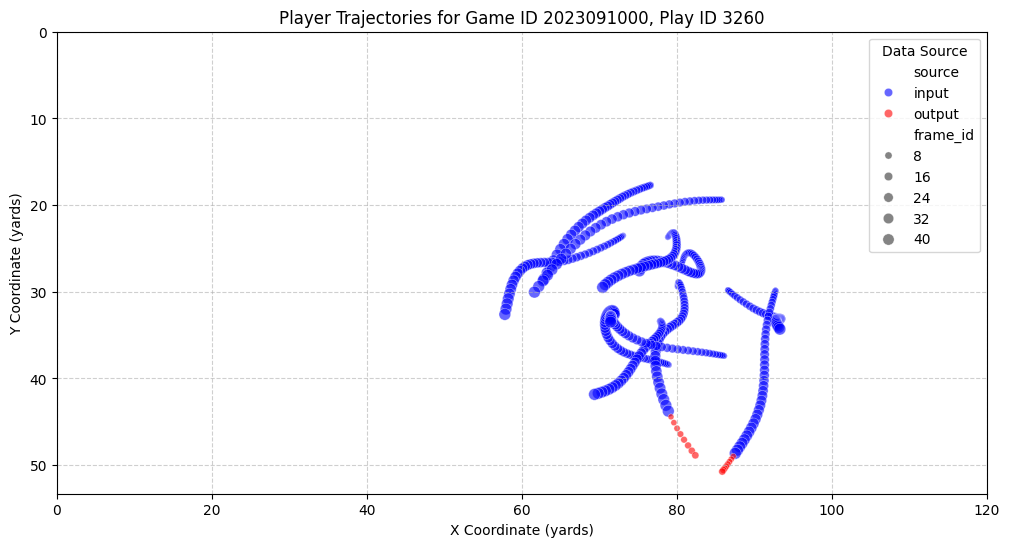


--- Plotting Play: Game ID 2023091007, Play ID 1794 ---


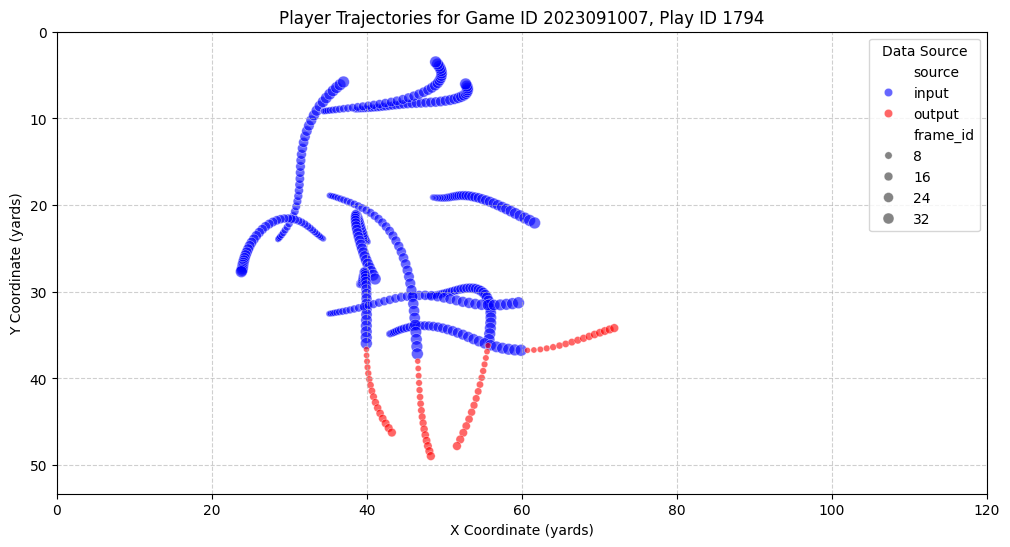


--- Plotting Play: Game ID 2023091100, Play ID 2358 ---


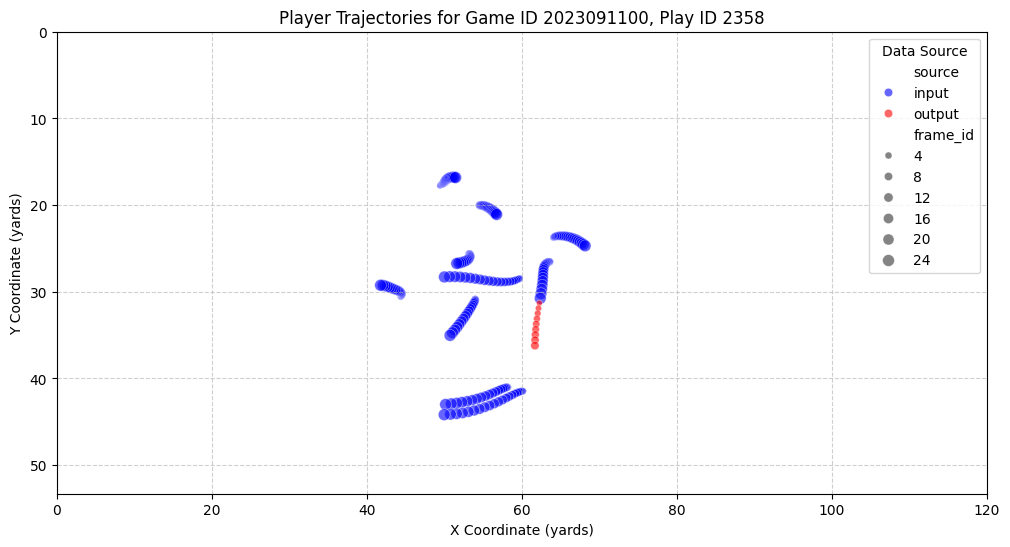

In [17]:
# Step 8 — QuickVisualization: single-play sanity check

print("--- Quick Visualization: Single-Play Sanity Check ---")

if 'week1_input_df' in locals() and week1_input_df is not None and 'week1_output_df' in locals() and week1_output_df is not None:

    # Get unique game_id and play_id combinations from the input data
    # Sample a few plays for visualization
    plays_to_visualize = week1_input_df[['game_id', 'play_id']].drop_duplicates().sample(min(3, len(week1_input_df[['game_id', 'play_id']].drop_duplicates())), random_state=42) # Sample up to 3 plays

    print(f"\nVisualizing {len(plays_to_visualize)} sample plays:")

    for index, play in plays_to_visualize.iterrows():
        game_id = play['game_id']
        play_id = play['play_id']

        print(f"\n--- Plotting Play: Game ID {game_id}, Play ID {play_id} ---")

        # Filter input and output data for the current play
        play_input_df = week1_input_df[(week1_input_df['game_id'] == game_id) & (week1_input_df['play_id'] == play_id)].copy()
        play_output_df = week1_output_df[(week1_output_df['game_id'] == game_id) & (week1_output_df['play_id'] == play_id)].copy()

        # Combine input and output data for plotting, adding a source column
        play_input_df['source'] = 'input'
        play_output_df['source'] = 'output'

        combined_play_df = pd.concat([play_input_df[['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y', 'source']],
                                      play_output_df[['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y', 'source']]])

        # Plotting
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=combined_play_df, x='x', y='y', hue='source', size='frame_id', alpha=0.6, palette={'input': 'blue', 'output': 'red'})

        # Add title and labels
        plt.title(f'Player Trajectories for Game ID {game_id}, Play ID {play_id}')
        plt.xlabel('X Coordinate (yards)')
        plt.ylabel('Y Coordinate (yards)')

        # Set field limits
        plt.xlim(0, 120)
        plt.ylim(0, 53.3)

        # Invert y-axis to match typical football field orientation (optional, but common)
        plt.gca().invert_yaxis()

        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(title='Data Source')
        plt.show()

else:
    print("Input or Output DataFrame not loaded. Skipping visualization.")

In [18]:
# Step 9 — Identify target / receiver & defender sets

print("--- Identify Target / Receiver & Defender Sets ---")

if 'week1_input_df' in locals() and week1_input_df is not None:
    # Select a sample play from the input data
    sample_play = week1_input_df[['game_id', 'play_id']].drop_duplicates().sample(1, random_state=42).iloc[0]
    sample_game_id = sample_play['game_id']
    sample_play_id = sample_play['play_id']

    print(f"\nAnalyzing sample play: Game ID {sample_game_id}, Play ID {sample_play_id}")

    # Filter input data for the sample play
    play_input_df = week1_input_df[(week1_input_df['game_id'] == sample_game_id) & (week1_input_df['play_id'] == sample_play_id)].copy()

    # Identify the targeted receiver
    targeted_receiver_df = play_input_df[play_input_df['player_role'] == 'Targeted Receiver']

    if not targeted_receiver_df.empty:
        targeted_receiver_nfl_id = targeted_receiver_df['nfl_id'].iloc[0]
        targeted_receiver_name = targeted_receiver_df['player_name'].iloc[0]
        print(f"Targeted Receiver (nfl_id: {targeted_receiver_nfl_id}): {targeted_receiver_name}")

        # Identify defensive players in this play
        defensive_players_df = play_input_df[play_input_df['player_side'] == 'Defense']
        defensive_player_nfl_ids = defensive_players_df['nfl_id'].unique().tolist()
        defensive_player_names = defensive_players_df[['nfl_id', 'player_name']].drop_duplicates().set_index('nfl_id')['player_name'].to_dict()


        print(f"\nDefensive Players in this play ({len(defensive_player_nfl_ids)}):")
        for nfl_id in defensive_player_nfl_ids:
            print(f"- {defensive_player_names.get(nfl_id, 'Unknown Player')} (nfl_id: {nfl_id})")

        # You can now use the targeted_receiver_nfl_id and defensive_player_nfl_ids for further analysis
        # For example, to find defender positions relative to the receiver in output frames.

    else:
        print("No Targeted Receiver found in this play.")

else:
    print("Input DataFrame not loaded. Skipping identification.")

--- Identify Target / Receiver & Defender Sets ---

Analyzing sample play: Game ID 2023091000, Play ID 3260
Targeted Receiver (nfl_id: 54616): Tyler Allgeier

Defensive Players in this play (7):
- C.J. Henderson (nfl_id: 52417)
- Donte Jackson (nfl_id: 46124)
- Frankie Luvu (nfl_id: 46527)
- Jeremy Chinn (nfl_id: 52472)
- Shaq Thompson (nfl_id: 42368)
- Vonn Bell (nfl_id: 43350)
- Xavier Woods (nfl_id: 45004)


## Step 10 — List fields to reconstruct and how

**Aim:** finalize the reconstruction checklist so future work is clear.
**Do:** create a markdown table of fields you must derive from x,y in output.
**Why:** explicit formulas let you prototype and test consistently.
**Produce:** the table with formula lines and note to compute on smoothed coordinates (not raw).

| Field                       | Formula                                     | Notes                                     |
| :-------------------------- | :------------------------------------------ | :---------------------------------------- |
| `s` (speed)                 | `sqrt((dx/dt)^2 + (dy/dt)^2)`               | Compute on smoothed coordinates          |
| `vpx`, `vpy` (velocity components) | `dx/dt`, `dy/dt`                            | Compute on smoothed coordinates          |
| `a` (acceleration)          | `dv/dt`                                     | Compute on smoothed coordinates          |
| `dir` or `heading`          | `atan2(dy, dx)`                             | Compute on smoothed coordinates; handle angles |
| `closing radial velocity`   | Projection of velocity toward ball_land point | Requires `ball_land_x`, `ball_land_y` from input |

**Note:** These calculations should be performed on **smoothed** coordinates to reduce noise from tracking data.

--- Statistical Checks for Speed (s) and Acceleration (a) in Input Data ---

Descriptive Statistics for Speed (s):


,s
count,285714.000000
mean,3.041966
std,2.231126
min,0.000000
25%,1.120000
50%,2.730000
75%,4.650000
max,12.530000



Descriptive Statistics for Acceleration (a):


,a
count,285714.000000
mean,2.126249
std,1.430355
min,0.000000
25%,1.010000
50%,1.920000
75%,3.050000
max,17.120000


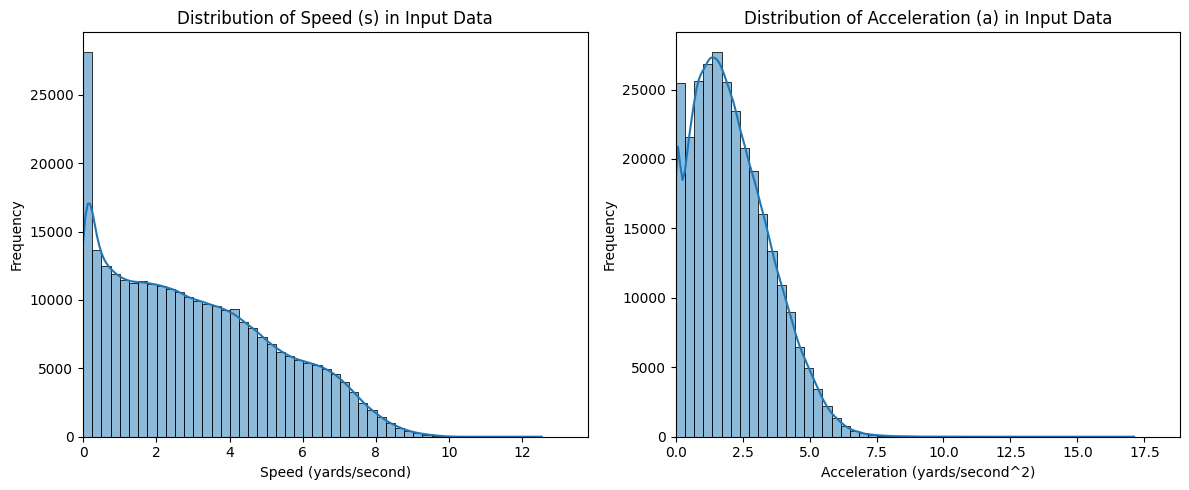


--- Plausible Physical Bounds Notes ---
Note that typical maximum human running speed is around 10-12 yards/second.
Maximum observed speed (s) in input data: 12.53 yards/second
Maximum observed acceleration (a) in input data: 17.12 yards/second^2


In [19]:
# Step 11 — Small statistical checks for distributions

print("--- Statistical Checks for Speed (s) and Acceleration (a) in Input Data ---")

if 'week1_input_df' in locals() and week1_input_df is not None:
    # Check distributions for 's' and 'a'
    print("\nDescriptive Statistics for Speed (s):")
    display(week1_input_df['s'].describe())

    print("\nDescriptive Statistics for Acceleration (a):")
    display(week1_input_df['a'].describe())

    # Optional: Plot histograms for visual inspection
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(week1_input_df['s'], bins=50, kde=True)
    plt.title('Distribution of Speed (s) in Input Data')
    plt.xlabel('Speed (yards/second)')
    plt.ylabel('Frequency')
    plt.xlim(0, week1_input_df['s'].max() * 1.1) # Adjust xlim based on max speed

    plt.subplot(1, 2, 2)
    sns.histplot(week1_input_df['a'], bins=50, kde=True)
    plt.title('Distribution of Acceleration (a) in Input Data')
    plt.xlabel('Acceleration (yards/second^2)')
    plt.ylabel('Frequency')
    plt.xlim(0, week1_input_df['a'].max() * 1.1) # Adjust xlim based on max acceleration


    plt.tight_layout()
    plt.show()

    print("\n--- Plausible Physical Bounds Notes ---")
    print("Note that typical maximum human running speed is around 10-12 yards/second.")
    print(f"Maximum observed speed (s) in input data: {week1_input_df['s'].max():.2f} yards/second")
    print(f"Maximum observed acceleration (a) in input data: {week1_input_df['a'].max():.2f} yards/second^2")


else:
    print("Input DataFrame not loaded. Skipping statistical checks.")

## Step 12 — Data Schema & Time Logic Summary

**Dataset Files Used:**

*   `input_2023_w[01-18].csv` (Example: `input_2023_w01.csv`)
*   `output_2023_w[01-18].csv` (Example: `output_2023_w01.csv`)
*   `supplementary.csv`

**Key Fields Present in Each File:**

*   **Input Data:** Contains player tracking data *before* the pass is thrown. Key fields include `game_id`, `play_id`, `nfl_id`, `frame_id`, `x`, `y`, `s`, `a`, `dir`, `o`, player attributes (`player_to_predict`, `player_name`, `player_height`, `player_weight`, `player_birth_date`, `player_position`, `player_side`, `player_role`), `num_frames_output`, `ball_land_x`, and `ball_land_y`.
*   **Output Data:** Contains player tracking data *after* the pass is thrown for players to predict. Key fields include `game_id`, `play_id`, `nfl_id`, `frame_id`, `x`, and `y`.
*   **Supplementary Data:** Provides contextual information about games and plays. Key fields include `game_id`, `season`, `week`, `game_date`, `play_id`, `play_description`, `quarter`, `game_clock`, `down`, `yards_to_go`, `possession_team`, `defensive_team`, `pass_result`, `pass_length`, `offense_formation`, `route_of_targeted_receiver`, and various win probability metrics.

**The Throw-Window Definition:**

*   The **input data** covers the tracking frames *before* the ball is thrown.
*   The **output data** covers the tracking frames *after* the ball is thrown. These frames correspond to the ball being in the air. The number of frames in the output for a given player and play is indicated by `num_frames_output` in the input data.

**Fields to Reconstruct and Formulas (from Step 10):**

From the `x` and `y` coordinates in the output data, the following fields need to be reconstructed. These calculations should ideally be performed on **smoothed** coordinates:

*   `s` (speed): `sqrt((dx/dt)^2 + (dy/dt)^2)`
*   `vpx`, `vpy` (velocity components): `dx/dt`, `dy/dt`
*   `a` (acceleration): `dv/dt`
*   `dir` or `heading`: `atan2(dy, dx)`
*   `closing radial velocity`: Projection of velocity toward the `ball_land_x`, `ball_land_y` point (requires merging `ball_land_x/y` from input).

**Integrity Checks Performed and Their Results (Step 5 & 7):**

*   **Uniqueness Checks (Step 5):**
    *   Supplementary data on `(game_id, play_id)`: **No duplicates found** (for Week 1).
    *   Input data on `(game_id, play_id, nfl_id)`: **Duplicates found** (for Week 1). This suggests multiple tracking points for the same player in a single frame in the input data.
    *   Output data on `(game_id, play_id, nfl_id, frame_id)`: **No duplicates found** (for Week 1).
*   **Cross-file Play Matching (Step 7):**
    *   Number of unique plays in Input data (Week 1): 819
    *   Number of unique plays in Output data (Week 1): 819
    *   Number of unique plays in Supplementary data: 18009
    *   Plays in Input data only (compared to Output): 0
    *   Plays in Output data only (compared to Input): 0
    *   Plays in Supplementary data not in Input/Output (Week 1): 17190. This indicates supplementary data covers a larger set of plays than the Week 1 tracking data.

This summary provides a clear overview of the data's structure, the time window for analysis, the metrics that need to be reconstructed, and the initial findings from the integrity checks.

In [22]:
# Step 13 — Save a small merged sample for next notebook

print("--- Saving Small Merged Sample ---")

if 'week1_input_df' in locals() and week1_input_df is not None and 'week1_output_df' in locals() and week1_output_df is not None:

    # Select a few plays that are present in both input and output data
    # We can reuse the 'plays_to_visualize' from Step 8 if needed, or sample new ones
    # Let's sample 3 plays for the merged sample
    sample_plays_for_merge = week1_input_df[['game_id', 'play_id']].drop_duplicates().sample(min(3, len(week1_input_df[['game_id', 'play_id']].drop_duplicates())), random_state=100) # Use a different random state

    print(f"\nMerging and saving data for {len(sample_plays_for_merge)} sample plays:")
    print(sample_plays_for_merge)

    # Filter input and output data for the selected plays
    merged_sample_df = pd.DataFrame()

    for index, play in sample_plays_for_merge.iterrows():
        game_id = play['game_id']
        play_id = play['play_id']

        play_input_df = week1_input_df[(week1_input_df['game_id'] == game_id) & (week1_input_df['play_id'] == play_id)].copy()
        play_output_df = week1_output_df[(week1_output_df['game_id'] == game_id) & (week1_output_df['play_id'] == play_id)].copy()

        # Merge input and output data for this play
        # We need to merge on game_id, play_id, nfl_id, and frame_id
        # Note: Input data has frame_id up to the throw, Output data has frame_id after the throw
        # The challenge is how to combine these. For a simple sample, we can potentially
        # just concatenate the relevant columns after aligning by player and frame if needed.
        # However, the plan implies merging on game_id, play_id, nfl_id for player attributes + ball_land
        # and then having output frames. A full merge on all keys might not work directly due to different frame ranges.

        # Get input data with player attributes and ball_land info for these plays
        input_attributes = play_input_df[['game_id', 'play_id', 'nfl_id', 'player_to_predict', 'player_name',
                                           'player_height', 'player_weight', 'player_birth_date', 'player_position',
                                           'player_side', 'player_role', 'num_frames_output', 'ball_land_x', 'ball_land_y']].drop_duplicates(subset=['game_id', 'play_id', 'nfl_id'])

        # Get output data for these plays
        output_frames = play_output_df[['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y']]

        # Merge the input attributes with the output frames
        # We'll merge on game_id, play_id, nfl_id
        merged_play_df = pd.merge(output_frames, input_attributes, on=['game_id', 'play_id', 'nfl_id'], how='left')

        merged_sample_df = pd.concat([merged_sample_df, merged_play_df])

    # Display the columns and their data types of the merged dataframe
    print("\nColumns and Data Types in the merged sample dataframe:")
    display(merged_sample_df.dtypes)

    # Define the output directory and file path
    output_dir = Path('data/interim')
    output_dir.mkdir(parents=True, exist_ok=True) # Create directory if it doesn't exist
    output_file_path = output_dir / 'merged_sample.parquet'

    # Save the merged sample to a Parquet file
    try:
        merged_sample_df.to_parquet(output_file_path, index=False)
        print(f"\nMerged sample saved to: {output_file_path}")
        display(merged_sample_df.head()) # Display head of the saved sample
    except Exception as e:
        print(f"Error saving merged sample to Parquet: {e}")


else:
    print("Input or Output DataFrame not loaded. Skipping saving merged sample.")

--- Saving Small Merged Sample ---

Merging and saving data for 3 sample plays:
           game_id  play_id
225439  2023091011     2093
130353  2023091006     1974
78824   2023091003     3335

Columns and Data Types in the merged sample dataframe:


,0
game_id,int64
play_id,int64
nfl_id,int64
frame_id,int64
x,float64
y,float64
player_to_predict,bool
player_name,object
player_height,object
player_weight,int64



Merged sample saved to: data/interim/merged_sample.parquet


,game_id,play_id,nfl_id,frame_id,x,y,player_to_predict,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,num_frames_output,ball_land_x,ball_land_y
0,2023091011,2093,46194,1,51.30,33.99,True,Avonte Maddox,5-9,184,1996-03-31,CB,Defense,Defensive Coverage,11,55.450001,25.559999
1,2023091011,2093,46194,2,51.68,34.15,True,Avonte Maddox,5-9,184,1996-03-31,CB,Defense,Defensive Coverage,11,55.450001,25.559999
2,2023091011,2093,46194,3,52.07,34.31,True,Avonte Maddox,5-9,184,1996-03-31,CB,Defense,Defensive Coverage,11,55.450001,25.559999
3,2023091011,2093,46194,4,52.47,34.45,True,Avonte Maddox,5-9,184,1996-03-31,CB,Defense,Defensive Coverage,11,55.450001,25.559999
4,2023091011,2093,46194,5,52.89,34.57,True,Avonte Maddox,5-9,184,1996-03-31,CB,Defense,Defensive Coverage,11,55.450001,25.559999


Nice — here’s a clean, action-oriented **step-by-step checklist** for `01_data_exploration.ipynb`.
Each step contains: **what to do**, **why it matters**, and **what to produce/check** so you’ll always know *what* and *why* you did it.

Copy this into your notebook as headings and run each step one-by-one.

---

## Step 0 — Notebook header

**Aim:** declare purpose and keep the notebook self-documenting.
**Do:** add a top markdown cell:

* Title: `01_data_exploration.ipynb`
* Objective: “Inspect input/output/supplementary; confirm throw-window logic; list fields to reconstruct; produce Data Schema & Time Logic Summary.”
  **Produce:** short header so anyone opening the notebook knows the goal.

---

## Step 1 — Imports & file paths

**Aim:** make environment reproducible and files easy to load.
**Do:** import pandas, numpy, matplotlib, seaborn (optional), pathlib. Set data paths for `data/raw/`.
**Check:** notebook runs without import errors.
**Produce:** a small code cell showing file paths.

---

## Step 2 — Quick file load & shape check

**Aim:** confirm files load and see basic row/col counts.
**Do:** `pd.read_csv()` each of `input_*.csv`, `output_*.csv`, `supplementary.csv` for at least one week file. Print `.shape` and `.columns`.
**Why:** ensures files exist and columns match expectations; reveals immediate size/memory considerations.
**Produce / Check:** prints like:

* `Input shape: (n_rows, n_cols)`
* `Output shape: ...`
* `Supplementary shape: ...`

---

## Step 3 — Column inventory per file

**Aim:** list what fields exist where (quick data dictionary).
**Do:** for each df run `df.columns.tolist()` and `df.dtypes`. Note fields present only in input (e.g., `s, a, o, dir, ball_land_x/y`), and fields present only in output (`frame_id`, `x,y` after throw).
**Why:** identifies exactly what must be reconstructed or merged.
**Produce:** a tiny markdown table showing `Field | Input | Output | Supplementary`.

---

## Step 4 — Missingness & types

**Aim:** detect nulls, weird types, or garbage values early.
**Do:** `df.isna().sum()` and `df.describe()` for numeric ranges (especially `x`, `y`). Look for NaNs in `ball_land_x/y`, `num_frames_output`, or `frame_id`.
**Why:** missing values affect merging, reconstruction, and metric validity.
**Produce / Check:** list of columns with >0% missing; note whether `x,y` have invalid ranges (<0 or >field dims).

---

## Step 5 — Uniqueness & key-structure validation

**Aim:** verify identity integrity fundamentals.
**Do:** run checks:

* `input_df.duplicated(['game_id','play_id','nfl_id']).any()`
* `output_df.duplicated(['game_id','play_id','nfl_id','frame_id']).any()`
* `supp_df.duplicated(['game_id','play_id']).any()`
  Also check `input`’s `num_frames_output` vs `output` max `frame_id` per (game_id,play_id,nfl_id).
  **Why:** prevents silent ID mixing later.
  **Produce / Check:** assert tests or a small report listing any violations (if violations exist, log them).

---

## Step 6 — Frame rate & temporal consistency

**Aim:** confirm frame rate (frames per second) and per-play frame continuity.
**Do:** for several plays compute `max(frame_id)` and infer duration as `max_frame / assumed_frame_rate` (assume 10Hz initially). Check if `frame_id` is sequential 1..N.
**Why:** smoothing and derivative formulas depend on correct Δt.
**Produce / Check:** list of sample plays with `max_frame`, and note if any non-1 start or gaps exist.

---

## Step 7 — Cross-file play matching

**Aim:** ensure plays in input map to output and supplementary.
**Do:** compute counts per play and compare:

* Unique `(game_id,play_id)` in input vs supplementary vs output.
  Report plays present in input but missing in output, etc.
  **Why:** some plays may be filtered out (penalties, scrambles); know which to drop.
  **Produce / Check:** small Venn or counts and list of mismatched play ids.

---

## Step 8 — QuickVisualization: single-play sanity check

**Aim:** visually confirm coordinate orientation and consistency.
**Do:** pick 2–3 sample plays (one deep pass, one short, one contested). Plot `x,y` before throw (input) and after throw (output) on same axes. Color by `frame_id` (use alpha).
**Why:** confirms coordinate system (0–120 x axis, 0–53.3 y) and play_direction orientation.
**Produce / Check:** 2 plots per play: pre-throw scatter + post-throw trace. Verify shapes look like football plays, not noisy clouds.

---

## Step 9 — Identify target / receiver & defender sets

**Aim:** make sure you can identify targeted receiver and defender pool per play.
**Do:** from input look at `player_role` and `player_side` to find `Targeted Receiver` and `Defensive Coverage`. For each targeted receiver, list defenders present (their `nfl_id`s) in output frames.
**Why:** SG and CCI need nearest defenders and defender sets.
**Produce / Check:** sample mapping for a play like `target_nfl_id: [def1, def2,...]`.

---

## Step 10 — List fields to reconstruct and how

**Aim:** finalize the reconstruction checklist so future work is clear.
**Do:** create a markdown table of fields you must derive from `x,y` in output:

* `s` = speed = sqrt((dx/dt)^2 + (dy/dt)^2)
* `vpx, vpy` = velocity components = dx/dt, dy/dt
* `a` = acceleration = dv/dt
* `dir` or heading = atan2(dy, dx)
* `closing radial velocity` = projection of velocity toward ball_land point
  **Why:** explicit formulas let you prototype and test consistently.
  **Produce:** the table with formula lines and note to compute on **smoothed** coordinates (not raw).

---

## Step 11 — Small statistical checks for distributions

**Aim:** get baseline stats to detect outliers and guide smoothing thresholds.
**Do:** compute distribution summaries for a sample of reconstructed-like values (or for `s`/`a` if present in input file): mean, median, max. Note plausible physical bounds (max speed ~ 11–12 yd/s).
**Why:** helps choose smoothing parameters and speed/accel caps.
**Produce / Check:** histograms for speed & acceleration; flag any extreme outliers for inspection.

---

## Step 12 — Produce the “Data Schema & Time Logic Summary” (deliverable)

**Aim:** create the one-page reference describing what you have and the reconstruction needs.
**Do:** write a single markdown cell with:

* Dataset files used
* Key fields present in each file
* The throw-window definition (output frames = ball-in-air)
* Fields to reconstruct and formulas (from Step 10)
* Integrity checks performed and their results (Step 5 & 7)
  **Why:** this is your official checkpoint before reconstruction — include in `reports/00_data_availability.md`.
  **Produce:** one-page summary saved to repo.

---

## Step 13 — Save a small merged sample for next notebook

**Aim:** prepare a tiny working file for reconstruction prototyping.
**Do:** merge one or two fully validated plays (on keys `game_id,play_id,nfl_id`) into a small parquet `data/interim/merged_sample.parquet` containing both input columns (player attributes + ball_land) and output frames for those plays.
**Why:** speeds up development and avoids repeatedly reloading massive files.
**Produce:** `merged_sample.parquet` (2–5 plays).

---

## Step 14 — Quick checklist & next actions

**Aim:** finalize and move to reconstruction with clarity.
**Do:** confirm:

* All uniqueness checks passed or logged.
* You have sample plays and `merged_sample.parquet`.
* Data Schema & Time Logic Summary saved.
* Notebook saved & committed to GitHub.
  **Why:** ensures reproducibility and a clear handoff to `02_data_reconstruction.ipynb`.
  **Produce:** short todo list for next notebook: smoothing method(s) to test, validation plays, config constants (frame_rate, smoothing windows).

---

### Small code hints (copy-paste friendly)

* Uniqueness check example:

```python
assert not output_df.duplicated(['game_id','play_id','nfl_id','frame_id']).any()
```

* Max frame vs num_frames_output:

```python
check = merged.groupby(['game_id','play_id','nfl_id']).agg(max_frame=('frame_id','max'), expected=('num_frames_output','first'))
(check['max_frame']==check['expected']).value_counts()
```

* Simple velocity estimate (for prototyping):

```python
df = df.sort_values('frame_id')
df['dx'] = df['x'].diff()
df['dy'] = df['y'].diff()
df['s_raw'] = np.sqrt(df['dx']**2 + df['dy']**2) * frame_rate  # frame_rate e.g. 10
```

---

If you follow these steps, at the end of this notebook you will have:

* A crystal-clear understanding of what data exists and what must be reconstructed,
* Validation that IDs and frames align,
* A saved small merged sample for fast prototyping,
* The one-page Data Schema & Time Logic Summary that documents the decisions.

Ready to start? If you want, I can now produce a ready-to-copy cell template for each step (code + markdown) so you can paste directly into `01_data_exploration.ipynb`.
